<img src="biopython_logo.png", width=300, height=300, align="center">

## Sesión 5
# BioPython

+ Seq
+ SeqIO

Enlaces de Interes:

+ [BioPython Wiki](http://biopython.org/)
+ [Tutorial](http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc2)
+ [Documentación](http://biopython.org/DIST/docs/api/Bio-module.html)\

Biopython es una librería que recoge utilidades para trabajar con datos biológicos. Algunas de sus utilidades incluyen funciones y clases para trabajar con secuencias, resultados Blast, estructuras de proteínas, árboles filogenéticos y con diferentes estructuras de datos usadas en Bioinformática, como lo son:

+ Blast output – both from standalone and WWW Blast
+ Clustalw
+ FASTA
+ GenBank
+ PubMed and Medline
+ ExPASy files, like Enzyme and Prosite
+ SCOP, including ‘dom’ and ‘lin’ files
+ UniGene
+ SwissProt

Puede trabajar con bases de datos:
+ NCBI - Blast, Entrez, PubMed

+ Manipulación de secuencias
+ Alineamientos

In [132]:
import Bio
print(Bio.__version__)


1.70


# Seq, objetos tipo secuencia
Seq es el objeto de BioPython para el manejo de las secuencias y todos sus atributos. Continue la secuencian en si, y el valor para el alfabeto utilizado. Veamos en [detalle](https://biopython.org/DIST/docs/api/Bio.Seq.Seq-class.html).

In [133]:
from Bio.Seq import Seq

my_seq = Seq("AGTACACTGGT")
print(my_seq)
print(my_seq.alphabet)

AGTACACTGGT
Alphabet()


Tenemos varias opciones de alfabeto para importar:
```python
from Bio.Alphabet import *
```
    extended_protein = ExtendedIUPACProtein()
    protein = IUPACProtein()
    ambiguous_dna = IUPACAmbiguousDNA()
    unambiguous_dna = IUPACUnambiguousDNA()
    extended_dna = ExtendedIUPACDNA()
    ambiguous_rna = IUPACAmbiguousRNA()
    unambiguous_rna = IUPACUnambiguousRNA()

Entre los métodos para objetos tipo ```seq``` tenemos:

```python
      myseq.complement()               
      myseq.reverse_complement()       
      myseq.transcribe()               
      myseq.back_transcribe()          
      myseq.translate()
      myseq.ungap()

```
Y además len(), split(),strip(),count(), endswith(),startswith().

El objeto ```seq``` tiene atributos como:
```python
    myseq.seq                 #regresa la secuencia
    myseq.alphabet            #regresa el alfabeto  
```


In [134]:
from Bio.Alphabet import IUPAC

messenger_rna = Seq("AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG", IUPAC.unambiguous_rna)
messenger_rna.translate()
messenger_rna.alphabet

IUPACUnambiguousRNA()

In [135]:
from Bio.Alphabet import generic_dna
dna_seq = Seq("acgtACGT", generic_dna)
print(dna_seq)
print(dna_seq.upper())
print(dna_seq.lower())

acgtACGT
ACGTACGT
acgtacgt


In [136]:
dna_seq.complement()

Seq('tgcaTGCA', DNAAlphabet())

## <span style=color:#990099/> Ejercicio
1. Crea un objeto Seq con la secuencia ‘ATCGGTGGCCTGAG’
2. ¿Cuántos residuos tiene? ¿Cuáles son las tres primeras letras? ¿Y la última? ¿Cuántas adeninas tiene? Convierte la secuencia en una cadena de texto normal sin alfabeto.
3. Crea la secuencia reversa complementaria de esa secuencia.
4. Crea y traduce la secuencia ‘ATGGCCATTGT’ a proteína.


<details>
  <summary> Respuesta </summary> 

``` python
#1
from Bio.Seq import Seq
secuencia = Seq('ATCGAGTGGACACTGAGT')
print(secuencia)
#2
print(len(secuencia))
print(secuencia[:3])
print(secuencia[-1])
print(secuencia.count('A'))
print(str(secuencia))
#3
secuencia.reverse_complement()
#4
secuencia2 = Seq('ATGGCCATTGT')
secuencia.translate()
```

# SeqIO
### Input/Output de secuencias como objetos SeqRecord
Permite iterar sobre las secuencias (records) de un archivo, por ejemplo fasta o gbk, pero además:
[SeqIO](https://biopython.org/wiki/SeqIO)

Métodos como SeqIO.parse nos permiten iterar sobre un archivo completo y ejecutar código para cada secuencia/record del archivo y obtener directamente atributos como id, secuencia y record completo:

In [137]:
from Bio import SeqIO

for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    print(seq_record.id)
    print(repr(seq_record.seq))
    print(len(seq_record))

gi|2765658|emb|Z78533.1|CIZ78533
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet())
740
gi|2765657|emb|Z78532.1|CCZ78532
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC', SingleLetterAlphabet())
753
gi|2765656|emb|Z78531.1|CFZ78531
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA', SingleLetterAlphabet())
748
gi|2765655|emb|Z78530.1|CMZ78530
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT', SingleLetterAlphabet())
744
gi|2765654|emb|Z78529.1|CLZ78529
Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA', SingleLetterAlphabet())
733
gi|2765652|emb|Z78527.1|CYZ78527
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC', SingleLetterAlphabet())
718
gi|2765651|emb|Z78526.1|CGZ78526
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT', SingleLetterAlphabet())
730
gi|2765650|emb|Z78525.1|CAZ78525
Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GC

En el ejemplo anterior, qué hace la función repr()? [repr()](https://docs.python.org/3/library/functions.html)

Con SeqIO.to_dict podemos convertir cada id y secuencia a un diccionario, esto es útil para archivos muy grandes.

In [138]:
from Bio import SeqIO
record_dict = SeqIO.to_dict(SeqIO.parse("ls_orchid.fasta", "fasta"))
print(record_dict["gi|2765658|emb|Z78533.1|CIZ78533"])

ID: gi|2765658|emb|Z78533.1|CIZ78533
Name: gi|2765658|emb|Z78533.1|CIZ78533
Description: gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
Number of features: 0
Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC', SingleLetterAlphabet())


### SeqIO con un genbank:

In [139]:
from Bio import SeqIO
with open("cor6_6.gb", "r") as mi_archivo:
    for record in SeqIO.parse(mi_archivo, "genbank"):
        print(record)
        print(record.id)
        print(record.features[2])
            
                
#location
#id
#qualifier

ID: X55053.1
Name: ATCOR66M
Description: A.thaliana cor6.6 mRNA
Number of features: 3
/molecule_type=mRNA
/data_file_division=PLN
/date=02-MAR-1992
/accessions=['X55053']
/sequence_version=1
/gi=16229
/keywords=['antifreeze protein homology', 'cold-regulated gene', 'cor6.6 gene', 'KIN1 homology']
/source=thale cress
/organism=Arabidopsis thaliana
/taxonomy=['Eukaryota', 'Viridiplantae', 'Streptophyta', 'Embryophyta', 'Tracheophyta', 'euphyllophytes', 'Spermatophyta', 'Magnoliophyta', 'eudicotyledons', 'Rosidae', 'Capparales', 'Brassicaceae', 'Arabidopsis']
/references=[Reference(title='Direct Submission', ...), Reference(title='cDNA sequence analysis and expression of two cold-regulated genes of Arabidopsis thaliana', ...)]
/comment=Cor6.6 homologous to KIN1. KIN1 is a cold-regulated Arabidopsis
gene with suggested similarity to type I fish antifreeze proteins.
Seq('AACAAAACACACATCAAAAACGATTTTACAAGAAAAAAATATCTGAAAAATGTC...AAA', IUPACAmbiguousDNA())
X55053.1
type: CDS
location: [49:250]

Accedemos aún más en detalle en el archivo:

In [142]:
from Bio import SeqIO

for rec in SeqIO.parse("cor6_6.gb", "genbank"):
    if rec.features:
        for feature in rec.features:
            if feature.type == "CDS":
                print(feature.location)
                print(feature.qualifiers["protein_id"])
                print(feature.location.extract(rec).seq)

[49:250](+)
['CAA38894.1']
ATGTCAGAGACCAACAAGAATGCCTTCCAAGCCGGTCAGGCCGCTGGCAAAGCTGAGGAGAAGAGCAATGTTCTGCTGGACAAGGCCAAGGATGCTGCTGCTGCAGCTGGAGCTTCCGCGCAACAGGCGGGAAAGAGTATATCGGATGCGGCAGTGGGAGGTGTTAACTTCGTGAAGGACAAGACCGGCCTGAACAAGTAG
join{[103:160](+), [319:390](+), [503:579](+)}
['CAA44171.1']
ATGTCAGAGACCAACAAGAATGCCTTCCAAGCCGGTCAGGCCGCTGGCAAAGCTGAGAGGAGAAGAGCAATGTTCTGCTGGACAAGGCCAAGGATGCTGCTGCTGCAGCTGGAGCTTCCGCGCAACAGGGCGGGAAAGAGTATATCGGATGCGGCAGTGGGAGGTGTTAACTTCGTGAAGGACAAGACCGGCCTGAACAAGTAG
[33:231](+)
['AAA32993.1']
ATGGCAGACAACAAGCAGAGCTTCCAAGCCGGTCAAGCCTCTGGTCGTGCTGAGGAGAAGGGTAATGTGCTGATGGACAAGGTCAAGGATGCTGCTACCGCAGCTGGAGCGTCTGCGCAAACCGCGGGACAGAAGATAACGGAGGCGGCAGGGGGAGCCGTTAATCTCGTGAAGGAGAAGACCGGCATGAACAAGTAG
join{[<0:48](+), [142:>206](+)}
['CAB39890.1']
GGACAAGGCCAAGGATGCTGCTGCTGCAGCTGGAGCTTCCGCGCAACAGGCGGGAAAGAACATATCGGATGCAGCAGCTGGAGGTGTTAACTTCGTGAAGGAGAAGACCGGC
[23:221](+)
['AAA91051.1']
ATGGCAGACAACAAGCAGAGCTTCCAAGCCGGTCAAGCCGCTGGTCGTGCTGAGGAGAAGGGTAATGTGCTGCTGATGGACAAGGTCAAGG

Podemos usar SeqIO para convertir entre diferentes formatos:

In [143]:
from Bio import SeqIO
count = SeqIO.convert("cor6_6.gb", "genbank", "cor6_6.fasta", "fasta")
print("Converted %i records" % count)

Converted 6 records


## <span style=color:#990099/> Ejercicio
1. Importar SeqIO
2. Crear una lista vacía llamada secuencias_cortas
3. Iterar para cada record utilizando SeqIOparse el archivo llamado cor6_6.gb cuyo formato es genbank
4. Evaluar la condición: len(record.seq) es menor a 300
5. Si es menor, entonces agregar el record a la lista de secuencias cortas.
6. Imprimir cuantas secuencias cortas se encontraron en el archivo
7. Opcional, buscar en la documentación como usar SeqIO.write para escribir las secuencias cortas en un archivo fasta aparte


<details>
  <summary> Respuesta </summary> 

``` python
#1
from Bio import SeqIO
#2
secuencias_cortas = [] 
#3
for record in SeqIO.parse("cor6_6.gb", "genbank"):
    if len(record.seq) < 300 : #4
        secuencias_cortas.append(record) #5
#6
print("Encontré "+str(len(secuencias_cortas))+" secuencias menores a 300bp")
#print("Encontré %i secuencias cortas" % len(secuencias_cortas))

#Un extra
SeqIO.write(secuencias_cortas, "cortas.fasta", "fasta")
```




### SeqIO con un fastq:
En este caso, SeqIO nos permite manipular atributos como la calidad por letra asignada a la secuencia y a partir de ahí podemos generar un filtro básico.

In [144]:
from Bio import SeqIO
from collections import defaultdict

good_reads = (rec for rec in \
              SeqIO.parse("../200reads.fastq", "fastq") \
              if min(rec.letter_annotations["phred_quality"]) >= 20)
count = SeqIO.write(good_reads, "good_quality.fastq", "fastq")
print("Saved %i reads" % count)

Saved 39 reads


### Plot del contenido GC

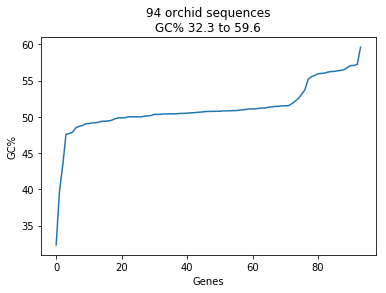

None


In [145]:
from Bio import SeqIO
from Bio.SeqUtils import GC
import pylab

gc_values = sorted(GC(rec.seq) for rec in SeqIO.parse("ls_orchid.fasta", "fasta"))

pylab.plot(gc_values)
pylab.title("%i orchid sequences\nGC%% %0.1f to %0.1f" \
            % (len(gc_values),min(gc_values),max(gc_values)))
pylab.xlabel("Genes")
pylab.ylabel("GC%")
print(pylab.show())

# AlignIO

Similar a SeqIO, AlignIO nos permite manipular diferentes formatos de alineamientos.[AlignIO](https://biopython.org/wiki/AlignIO)

In [123]:
from Bio import AlignIO
alignment = AlignIO.read("PF05371_seed.sth", "stockholm")
print(alignment)

SingleLetterAlphabet() alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73


In [146]:
print("Alignment length %i" % alignment.get_alignment_length())

Alignment length 52


In [125]:
for record in alignment:
    print("%s - %s" % (record.seq, record.id))

AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA - COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA - Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA - COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA - COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA - Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA - COATB_BPIF1/22-73


In [126]:
help(AlignIO)

Help on package Bio.AlignIO in Bio:

NAME
    Bio.AlignIO - Multiple sequence alignment input/output as alignment objects.

DESCRIPTION
    The Bio.AlignIO interface is deliberately very similar to Bio.SeqIO, and in
    fact the two are connected internally.  Both modules use the same set of file
    format names (lower case strings).  From the user's perspective, you can read
    in a PHYLIP file containing one or more alignments using Bio.AlignIO, or you
    can read in the sequences within these alignmenta using Bio.SeqIO.
    
    Bio.AlignIO is also documented at http://biopython.org/wiki/AlignIO and by
    a whole chapter in our tutorial:
    
    * `HTML Tutorial`_
    * `PDF Tutorial`_
    
    .. _`HTML Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.html
    .. _`PDF Tutorial`: http://biopython.org/DIST/docs/tutorial/Tutorial.pdf
    
    Input
    -----
    For the typical special case when your file or handle contains one and only
    one alignment, use the func

In [127]:
from Bio import AlignIO
count = AlignIO.convert("PF05371_seed.sth", "stockholm", "PF05371_seed.aln", "clustal")
print("Converted %i alignments" % count)

Converted 1 alignments


# BLAST

In [128]:
from Bio.Blast import NCBIWWW
help(NCBIWWW.qblast)

Help on function qblast in module Bio.Blast.NCBIWWW:

qblast(program, database, sequence, url_base='https://blast.ncbi.nlm.nih.gov/Blast.cgi', auto_format=None, composition_based_statistics=None, db_genetic_code=None, endpoints=None, entrez_query='(none)', expect=10.0, filter=None, gapcosts=None, genetic_code=None, hitlist_size=50, i_thresh=None, layout=None, lcase_mask=None, matrix_name=None, nucl_penalty=None, nucl_reward=None, other_advanced=None, perc_ident=None, phi_pattern=None, query_file=None, query_believe_defline=None, query_from=None, query_to=None, searchsp_eff=None, service=None, threshold=None, ungapped_alignment=None, word_size=None, alignments=500, alignment_view=None, descriptions=500, entrez_links_new_window=None, expect_low=None, expect_high=None, format_entrez_query=None, format_object=None, format_type='XML', ncbi_gi=None, results_file=None, show_overview=None, megablast=None)
    Do a BLAST search using the QBLAST server at NCBI or a cloud service
    provider.
  